# Real-Time Data: COVID-19 Outbreak behaviour Vs Government Measures.
Create dataframes from source data
    Hopkins
    Italy
    Etc..
Plot source data
Calculate descriptive dataframes
    early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe
    early1k_countries = Earliest 1000 cases (country_name,date,number)
    early_highrate = Earliest highest rate (what date was the highest rate for each country) 
    etc...
Plot descriptive data

# Create DFD a DataFrame of deceased from Hopkins data

In [129]:
# -*- coding: utf-8 -*-
"""
Plot rates of changes per day and per country froo the COVID epidemic
Created on Thu Apr 23 00:03:57 2020
@author: pmannoni
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfd=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesD= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfd.columns= colnamesD # Set new column names to df dataframe
dfd=dfd.drop(dfd.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfd.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
#colnamesD

# Create DFC a DataFrame of confirmed from Hopkins data

In [130]:
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfc=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesC= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfc.columns= colnamesC # Set new column names to df dataframe
dfc=dfc.drop(dfc.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfc.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
#dfc

# Create DFR a DataFrame of recovered from Hopkins data

In [131]:
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfr=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesR= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfr.columns= colnamesR # Set new column names to df dataframe
dfr=dfr.drop(dfr.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfr.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
#dfr

# create IDFD,IDFC,IDFR from Italian government regional file

# Get cases per country

In [132]:
dfd['France'].loc[dfd.index = '1000']  

SyntaxError: invalid syntax (<ipython-input-132-b55691d3413b>, line 1)

In [133]:
#mcountries=['France','Italy','Spain','Portugal','Germany','United Kingdom','Tanzania','Sweden','Poland','Brazil','South Africa','US']
mcountries=['France','Italy','Spain','Portugal','Germany','United Kingdom','Brazil','US']
#colnamesD

   # Plot dfd of selected countries

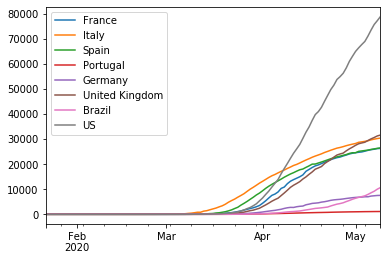

In [134]:
#  plot selected column with specific names of countries 
dfd[mcountries].plot()
#plt.savefig("line.jpg") # to save the figure as jpg

# Plot dfc of selected countries

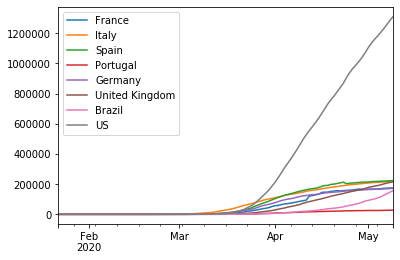

In [135]:
#  plot selected column with specific names of countries 
dfc[mcountries].plot()
#plt.savefig("line.jpg") # to save the figure as jpg

# Plot dfr of selected countries

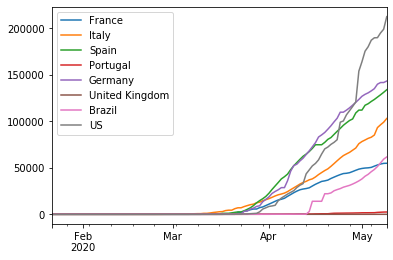

In [136]:
#  plot selected column with specific names of countries 
dfr[mcountries].plot()
#plt.savefig("line.jpg") # to save the figure as jpg

# Create dfd and dfc with rates (rates must be calculated with non cumulative data)

In [137]:
#dfdr=dfd.pct_change(periods=1)
##dfdr
#dfdr[mcountries].plot(legend=True,figsize=(20,10))

In [138]:
#dfrr=dfr.pct_change(periods=1)
##dfdr
#dfrr[mcountries].plot(legend=True,figsize=(20,10) )

In [139]:
#dfcr=dfc.pct_change(periods=1)
##dfdr
#dfcr[mcountries].plot(legend=True,figsize=(20,10) )

In [140]:
#dfd['US'].loc[dfd.index > '2020-03-20']  
#dfdr['US'].loc[dfdr.index > '2020-03-20']  
#dfdr['France'].loc[dfdr.index > '2020-02-28']


In [141]:
#for c in colnames:
   # print(c,dfd[c][dfd[c]!=0].index[0],dfd[c][dfd[c]!=0].iloc[0])

# Load file with confinement dates for each country

# Plot evolution with a line and circles where confinement ( conf) started


In [142]:
#Confinements dates & the date for the first confirmed case
df2=pd.read_csv('confinement_date.csv') # Dataframe of confinement
df2

,Unnamed: 0,France,Italy,Spain,Germany,Portugal,United Kingdom
0,First confirmed case,2020-01-24,2020-01-30,2020-01-02,2020-01-27,2020-03-02,2020-01-29
1,Begining first confinement,2020-03-17,2020-03-09,2020-03-15,2020-03-22,2020-03-19,2020-03-23
2,End of first confinement,2020-05-11,2020-05-04,2020-05-02,2020-05-04,2020-05-03,2020-05-29


In [143]:
#dfr=dfr.drop(dfr.index[[0,1,2,3]]) 
df2 = df2.drop(df2.columns[[0]], axis=1)# remove the first first  column
df2
#dfd

# Find the max value (maxvalue) and associated date (maxdate)in dfd_nc_fit
# create dfd_nc_fit_cf with filled Nan 
    # dfd_nc_fity_cf = dfd_nc_fit (with all values replaced by Nan)
    # check df.replace({'A': r'^ba.$'}, {'A': 'new'}, regex=True)
# put the value at the right date in dfd_nc_fit_cf
# dfd_nc_fit_cf['France'].loc[dfd_nc_fit_cf.index ==maxdate]=maxvalue


# plotting on dfd_nc_fit
#dfd_nc_fit_cf =
# index(dates) albania                           france
# 2020-02-10      Nan                            Nan
# 2020-02-11      Nan                           (value from dfd_nc_fit)
# 2020-02-12      (value from dfd_nc_fit)        Nan
# 2020-02-13      Nan                            Nan

,France,Italy,Spain,Germany,Portugal,United Kingdom
0,2020-01-24,2020-01-30,2020-01-02,2020-01-27,2020-03-02,2020-01-29
1,2020-03-17,2020-03-09,2020-03-15,2020-03-22,2020-03-19,2020-03-23
2,2020-05-11,2020-05-04,2020-05-02,2020-05-04,2020-05-03,2020-05-29


In [191]:
#countries = ['France','Italy','Spain','Germany','Portugal','United Kingdom']
#countries
#conf[countries].plot()


# Non cummulative data i.e. Daily data: prepared from cummulative data

Afghanistan               4.10
Albania                   1.05
Algeria                  17.00
Andorra                   1.60
Angola                    0.10
                         ...  
Western Sahara            0.00
Sao Tome and Principe     0.25
Yemen                     0.35
Comoros                   0.05
Tajikistan                1.00
Length: 266, dtype: float64

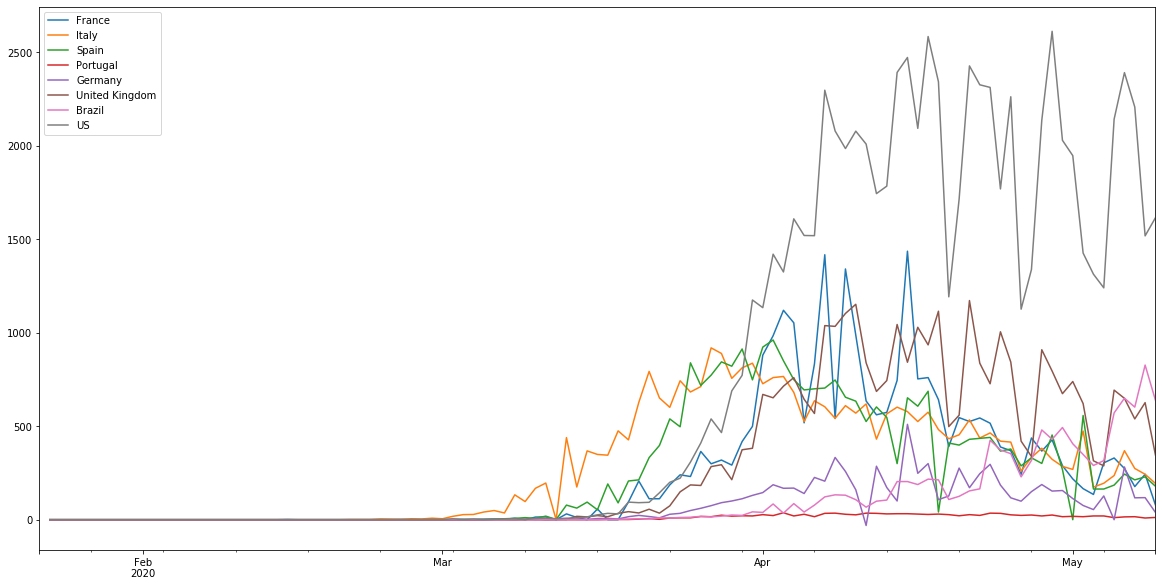

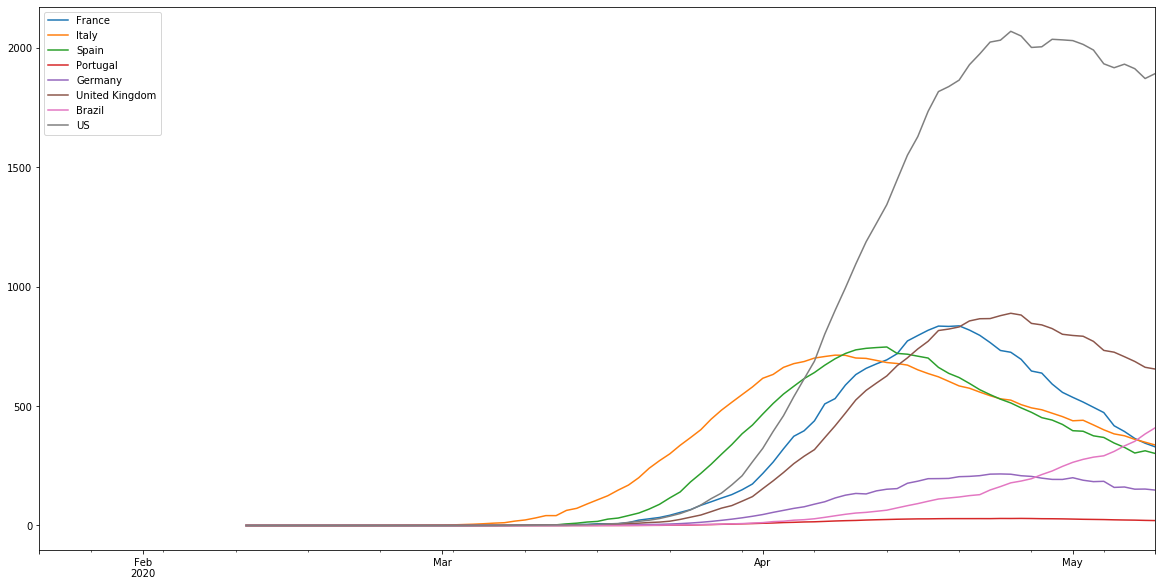

In [173]:
dfd_nc = dfd.diff()
#dfd_r=DFd.pct_change(periods=5)
dfd_nc[mcountries].plot(legend=True,figsize=(20,10) )

# loop over all the columns of dfd
for colname in colnamesD:
    # calculate rolling average for the coluimn and store into the column of dfd_ra
    dfd_nc[colname]= dfd_nc[colname].rolling(window=20).mean()
    
 #  print(dfd_nc)[colname].iloc[:,1]#.rolling(window=3).mean()
dfd_nc[mcountries].plot(legend=True,figsize=(20,10) )
dfd_nc.max()

## to save the figure as jpg
#plt.savefig("line.jpg")   

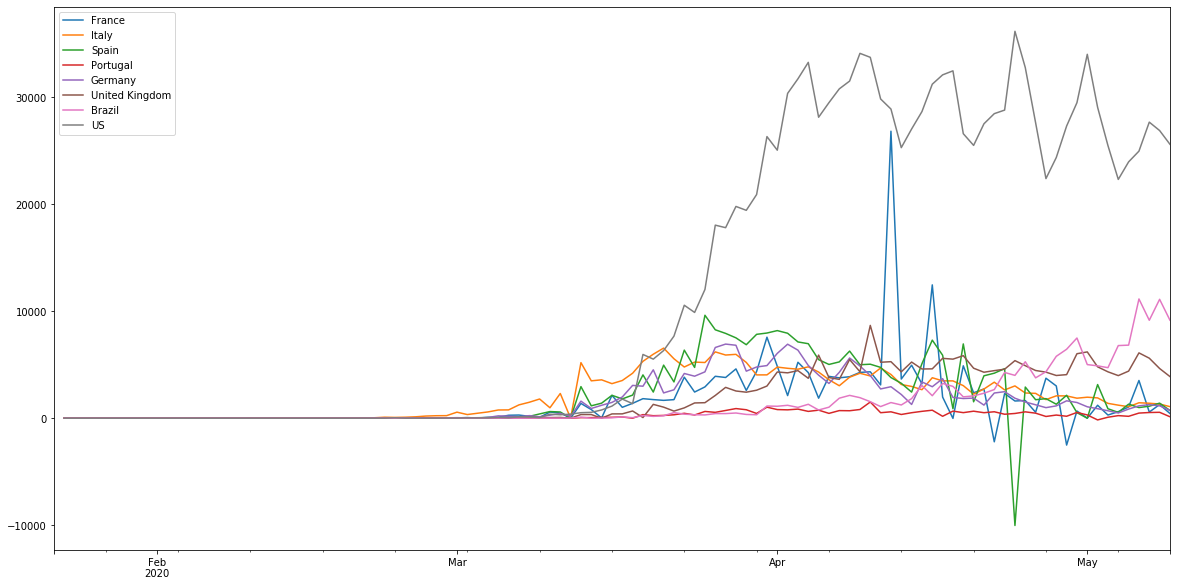

In [170]:
dfc_nc = dfc.diff()

#dfc_r=dfc_nc.pct_change(periods=1)
dfc_nc[mcountries].plot(legend=True,figsize=(20,10) )

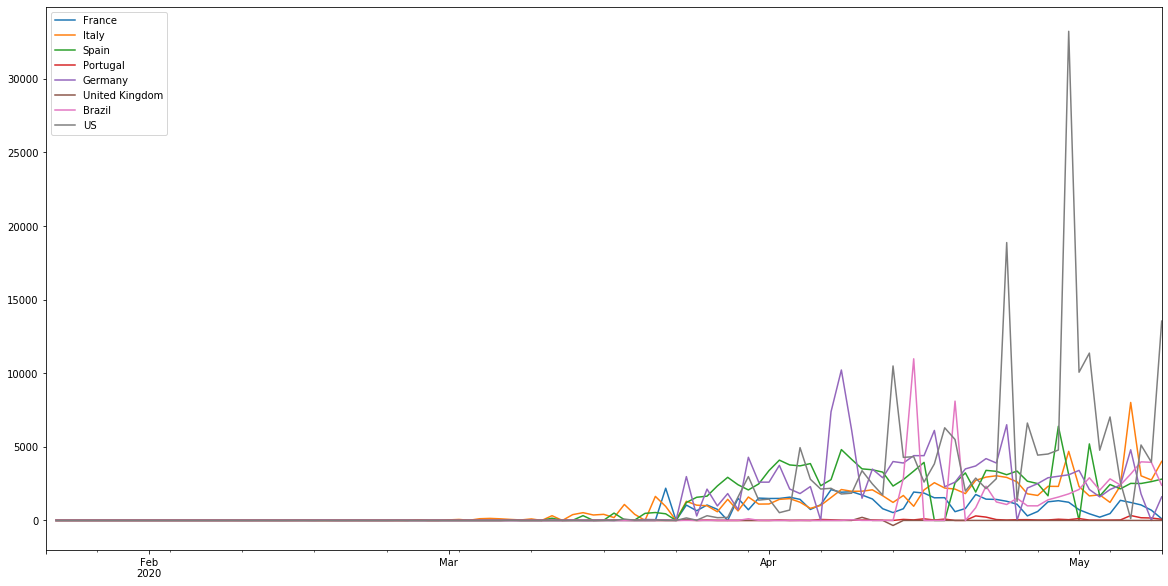

In [171]:
dfr_nc = dfr.diff()
#dfr_r=dfr_nc.pct_change(periods=2)
dfr_nc[mcountries].plot(legend=True,figsize=(20,10) )

# Inspecting the data from graph behaviours

In [201]:
#dfd_nc = dfd.diff()
#dfd_nc['Germany'].loc[dfd.index > '2020-04-09']
#dfd['Germany'].loc[dfd.index > '2020-04-09']

In [ ]:
#dfc_nc = dfc.diff()
#dfc_nc['France'].loc[dfc.index > '2020-04-09']
#dfc['France'].loc[dfc.index > '2020-04-09']

In [204]:
#dfc_cn = dfc.diff()
#dfc_nc['Spain'].loc[dfc.index > '2020-04-09']
dfc['Spain'].loc[dfc.index > '2020-04-09']

2020-04-10    158273
2020-04-11    163027
2020-04-12    166831
2020-04-13    170099
2020-04-14    172541
2020-04-15    177644
2020-04-16    184948
2020-04-17    190839
2020-04-18    191726
2020-04-19    198674
2020-04-20    200210
2020-04-21    204178
2020-04-22    208389
2020-04-23    213024
2020-04-24    202990
2020-04-25    205905
2020-04-26    207634
2020-04-27    209465
2020-04-28    210773
2020-04-29    212917
2020-04-30    213435
2020-05-01    213435
2020-05-02    216582
2020-05-03    217466
2020-05-04    218011
2020-05-05    219329
2020-05-06    220325
2020-05-07    221447
2020-05-08    222857
2020-05-09    223578
Name: Spain, dtype: object

# Make code to sort countries (top 20) by 
Earliest epidemic start : 
Earliest rate down
Earliest highest rate
Earliest diminishing rate
Strongest diminishiong rates
Richest 
poorest
number of inhabitants

# Create lists of countries (dfd,dfc,dfr):
early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe

early1k_countries = Earliest 1000 cases (country_name,date,number)

early_highrate = Earliest highest rate (what date was the highest rate for each country) 



# Create
dataframe where index is number of days since 100th case for all countries 

In [176]:
#dfc
#dfc[dfc["date"] > 50]
#dfc['colnames'].loc[dfc.index > '1000']

# early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe

In [175]:
#dfr[mcountries].plot()
#plt.savefig("line.jpg") # to save the figure as jpg